Data Loading


In [3]:
from google.colab import files
uploaded = files.upload()


Saving online_retail_II.xlsx to online_retail_II (1).xlsx


In [4]:
import pandas as pd
df = pd.read_excel("online_retail_II.xlsx")
df.head()



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Data Understanding


In [5]:
df.shape


(525461, 8)

In [6]:
df.columns


Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [8]:
df.isnull().sum()


,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927
Country,0


Data Cleaning


In [13]:
df = df.dropna(subset=['Customer ID'])
# removing missing CustomerID

In [14]:
df = df[df['Quantity'] > 0]
# remove negative quantity


In [16]:
df = df[df['Price'] > 0]
#remove negative or 0 price


In [18]:
df['Customer ID'] = df['Customer ID'].astype(int)
#Convert Customer ID to integer

/tmp/ipython-input-243554429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer ID'] = df['Customer ID'].astype(int)


In [20]:
df.rename(columns={
    'Customer ID': 'CustomerID',
    'Invoice': 'InvoiceNo',
    'Price': 'UnitPrice'
}, inplace=True)
#Rename Columns (Professional Step)



/tmp/ipython-input-1169904524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={


In [21]:

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 407664 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    407664 non-null  object        
 1   StockCode    407664 non-null  object        
 2   Description  407664 non-null  object        
 3   Quantity     407664 non-null  int64         
 4   InvoiceDate  407664 non-null  datetime64[ns]
 5   UnitPrice    407664 non-null  float64       
 6   CustomerID   407664 non-null  int64         
 7   Country      407664 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 28.0+ MB


In [23]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df.head()
# creating revenue column


/tmp/ipython-input-1961101034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue'] = df['Quantity'] * df['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [24]:
df.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue
count,407664.000000,407664,407664.000000,407664.000000,407664.000000
mean,13.585585,2010-07-01 10:15:11.871688192,3.294438,15368.592598,21.664909
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000,0.001000
25%,2.000000,2010-03-26 14:01:00,1.250000,13997.000000,4.950000
50%,5.000000,2010-07-09 15:47:00,1.950000,15321.000000,11.900000
75%,12.000000,2010-10-14 17:09:00,3.750000,16812.000000,19.500000
max,19152.000000,2010-12-09 20:01:00,10953.500000,18287.000000,15818.400000
std,96.840747,NaN,34.757965,1679.762138,77.150058


EDA


In [25]:
df['Revenue'].sum()


np.float64(8832003.274000002)

In [26]:
df['InvoiceNo'].nunique()


19213

In [27]:
df['CustomerID'].nunique()


4312

Monthly Revenue

/tmp/ipython-input-3563801475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')


<Axes: xlabel='YearMonth'>

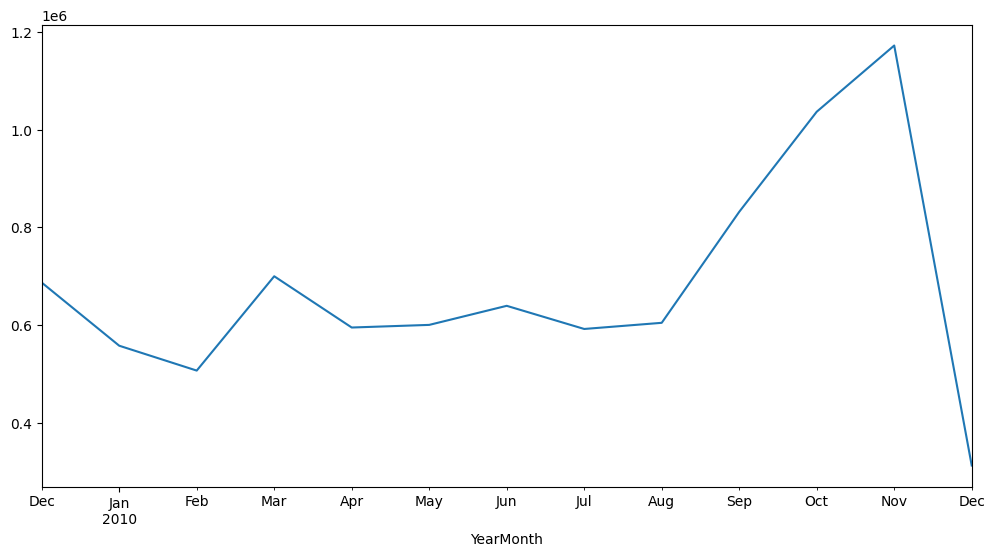

In [28]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

monthly_revenue = df.groupby('YearMonth')['Revenue'].sum()

monthly_revenue.plot(figsize=(12,6))


TOP 10 Products by Revenue

In [29]:
df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)


,Revenue
Description,
WHITE HANGING HEART T-LIGHT HOLDER,151624.31
REGENCY CAKESTAND 3 TIER,143893.35
Manual,98560.64
ASSORTED COLOUR BIRD ORNAMENT,70493.83
JUMBO BAG RED RETROSPOT,51759.30
POSTAGE,48741.08
ROTATING SILVER ANGELS T-LIGHT HLDR,40186.65
PAPER CHAIN KIT 50'S CHRISTMAS,36933.50
PARTY BUNTING,35035.90


Top Countries by Revenue


In [30]:
df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)


,Revenue
Country,
United Kingdom,7414755.963
EIRE,356085.210
Netherlands,268786.000
Germany,202395.321
France,146215.420
Sweden,53171.390
Denmark,50906.850
Spain,47601.420
Switzerland,43921.390


RFM Analysis


In [31]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
snapshot_date


Timestamp('2010-12-10 20:01:00')

In [32]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Revenue': 'sum'
})


In [33]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346,165,11,372.86
12347,3,2,1323.32
12348,74,1,222.16
12349,43,3,2671.14
12351,11,1,300.93


In [34]:
rfm.describe()


,Recency,Frequency,Monetary
count,4312.000000,4312.000000,4312.000000
mean,91.171846,4.455705,2048.238236
std,96.860633,8.170213,8914.481280
min,1.000000,1.000000,2.950000
25%,18.000000,1.000000,307.987500
50%,53.000000,2.000000,706.020000
75%,136.000000,5.000000,1723.142500
max,374.000000,205.000000,349164.350000


Recency


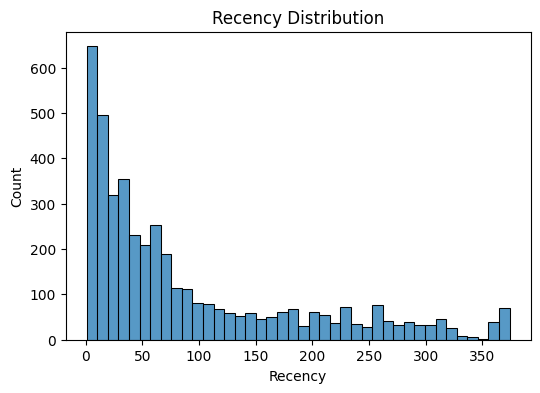

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.histplot(rfm['Recency'], bins=40)
plt.title("Recency Distribution")
plt.show()


Frequency


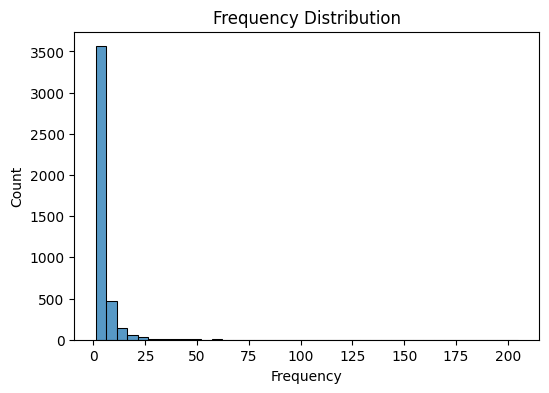

In [36]:
plt.figure(figsize=(6,4))
sns.histplot(rfm['Frequency'], bins=40)
plt.title("Frequency Distribution")
plt.show()


Monetary

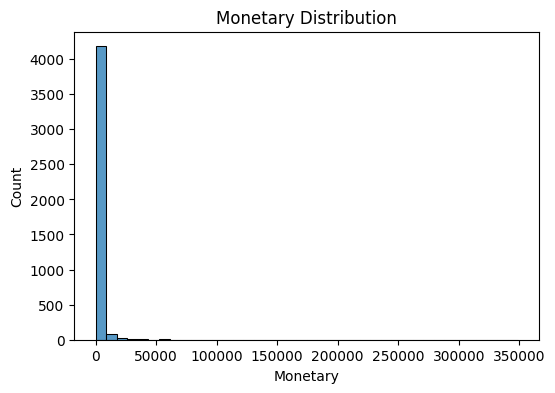

In [37]:
plt.figure(figsize=(6,4))
sns.histplot(rfm['Monetary'], bins=40)
plt.title("Monetary Distribution")
plt.show()


In [38]:
rfm['R_score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
#Recency Score (reverse ranking)

In [39]:
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'),
                         4, labels=[1,2,3,4])
#Frequency Score

In [40]:
rfm['M_score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])
#Monetary Score

combine Score

In [41]:
rfm['RFM_Score'] = (
    rfm['R_score'].astype(str) +
    rfm['F_score'].astype(str) +
    rfm['M_score'].astype(str)
)

rfm.head()


,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
CustomerID,,,,,,,
12346,165,11,372.86,1,4,2,142
12347,3,2,1323.32,4,2,3,423
12348,74,1,222.16,2,1,1,211
12349,43,3,2671.14,3,3,4,334
12351,11,1,300.93,4,1,1,411


Create Customer Segments

In [42]:
def segment_customer(row):
    if row['RFM_Score'] == '444':
        return 'Best Customers'
    elif row['F_score'] == 4:
        return 'Loyal Customers'
    elif row['R_score'] == 4:
        return 'Recent Customers'
    elif row['M_score'] == 4:
        return 'Big Spenders'
    else:
        return 'Regular Customers'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)


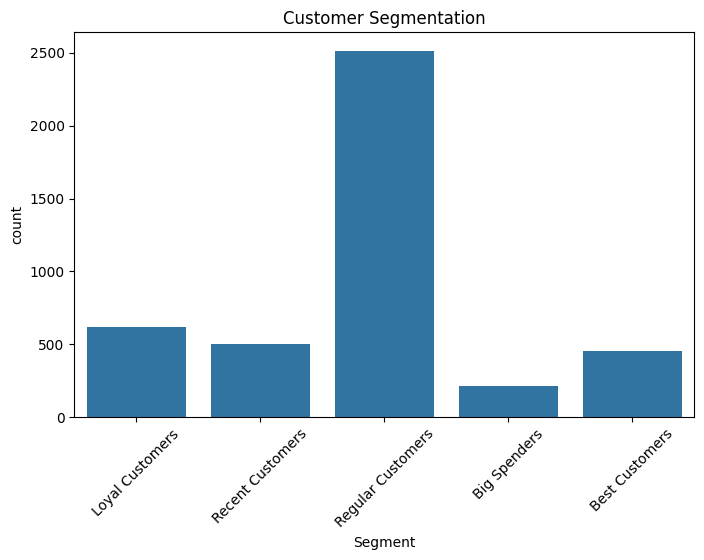

In [43]:
plt.figure(figsize=(8,5))
sns.countplot(x='Segment', data=rfm)
plt.xticks(rotation=45)
plt.title("Customer Segmentation")
plt.show()


Revenue Contribution by Segment

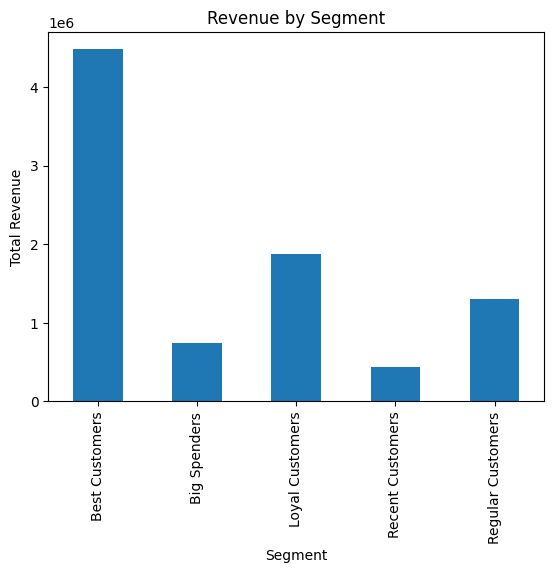

In [44]:
segment_revenue = rfm.groupby('Segment')['Monetary'].sum()

segment_revenue.plot(kind='bar')
plt.title("Revenue by Segment")
plt.ylabel("Total Revenue")
plt.show()


Create Average Revenue per Customer (by Segment)

In [46]:
avg_revenue_per_customer = rfm['Monetary'].mean()
print(f"Average Revenue per Customer: {avg_revenue_per_customer:.2f}")

Average Revenue per Customer: 2048.24


Frequency by Segment

In [48]:
avg_frequency = rfm['Frequency'].mean()
print(f"Average Frequency per Customer: {avg_frequency:.2f}")

Average Frequency per Customer: 4.46


Recency by Segment

In [50]:
avg_recency = rfm['Recency'].mean()
print(f"Average Recency per Customer: {avg_recency:.2f}")

Average Recency per Customer: 91.17


Revenue % Contribution

In [52]:
total_revenue = rfm['Monetary'].sum()
revenue_contribution = (segment_revenue / total_revenue) * 100
print("Revenue % Contribution by Segment:")
print(revenue_contribution.round(2).astype(str) + '%')

Revenue % Contribution by Segment:
Segment
Best Customers       50.67%
Big Spenders          8.42%
Loyal Customers      21.19%
Recent Customers      4.94%
Regular Customers    14.77%
Name: Monetary, dtype: object


Total Revenue Measure

In [54]:
Total_Revenue = rfm['Monetary'].sum()
print(f"Total Revenue: {Total_Revenue:.2f}")

Total Revenue: 8832003.27


Customer Count by Segment


In [58]:
customer_count = rfm.index.nunique()
print(f"Customer Count: {customer_count}")

Customer Count: 4312


Customer % Contribution


In [60]:
customer_count_by_segment = rfm.groupby('Segment').size()
total_customer_count = rfm.index.nunique()
customer_percentage_contribution = (customer_count_by_segment / total_customer_count) * 100
print("Customer % Contribution by Segment:")
print(customer_percentage_contribution.round(2).astype(str) + '%')

Customer % Contribution by Segment:
Segment
Best Customers       10.62%
Big Spenders          5.06%
Loyal Customers      14.38%
Recent Customers     11.64%
Regular Customers     58.3%
dtype: object


Average Revenue per Customer (Segment)


In [62]:
avg_revenue_per_segment = segment_revenue / customer_count_by_segment
print("Average Revenue per Customer by Segment:")
print(avg_revenue_per_segment.round(2))

Average Revenue per Customer by Segment:
Segment
Best Customers       9772.04
Big Spenders         3411.06
Loyal Customers      3018.67
Recent Customers      869.17
Regular Customers     519.05
dtype: float64
